In [1]:
#=================================================================================================================
#                                           Libraries
#=================================================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL 
import os
import joblib
from sklearn.model_selection import train_test_split


In [2]:
#=================================================================================================================
#                                           Image Preparation
#=================================================================================================================

def load_custom_dataset(dataset_path):
    images = []
    labels = []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                label = os.path.basename(root)
                image_path = os.path.join(root, file)

                images.append(preprocess_image(image_path))
                #images.append(image_path)
                labels.append(label)
            
    return np.array(images), np.array(labels)

def preprocess_image(image_path):
    img = PIL.Image.open(image_path)
            
    # convert to grayscale
    img = img.convert('L')
    # resize 
    img = img.resize((8,8))
    
    return np.insert(np.array(img).flatten(), 0, 1)



In [3]:
#=================================================================================================================
#                                          Loading Dataset
#=================================================================================================================

try:
    images = joblib.load('images.joblib')
    labels = joblib.load('labels.joblib')
except:
    images, labels = load_custom_dataset("Dataset")

In [4]:
joblib.dump(images, 'images.joblib')
joblib.dump(labels, 'labels.joblib')

['labels.joblib']

In [5]:
### =================================================================================================================
#                                          Splitting Dataset
#=================================================================================================================
test_size = 1/5
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(images, 
                                                    labels, 
                                                    test_size=test_size, 
                                                    random_state=random_state)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} 
$$

In [6]:
#=================================================================================================================
#                                           Implement Your Algorithm
#=================================================================================================================

sigmoid = lambda x: 1 / (1 + np.exp(-x))
epsilon = 1e-15

def compute_cost(X, y, w):    
    
    m = X.shape[0]
    
    predictions = sigmoid(np.dot(X, w))
    
    cost = -y * np.log(predictions + epsilon) - (1 - y) * np.log(1 - predictions + epsilon)
    total_cost = np.sum(cost)
    return total_cost / m



def compute_gradient(X, y, w):    
    m, n = X.shape
    predictions = sigmoid(np.dot(X, w))
    diff = predictions - y
    
    dj_dw = np.dot(X.T, diff) / m
    return dj_dw

    
def gradient_descent(X, y, w, cost_function, gradient_function, alpha, num_iters, plot_data_interval=50): 
    m = len(X)
    
    j_history = []
    
    for i in range(num_iters):
        
        w = w - alpha * gradient_function(X, y, w) 
        
        
        if i % (num_iters/10) == 0 or i == num_iters-1:
            print(i, cost_function(X, y, w))
            
        if i % plot_data_interval == 0:
            j_history.append((i, cost_function(X, y, w)))

        
    
    print("Done!")
    return w, np.array(j_history)


def logistic_gradient_descent(X, y, w, alpha, num_iters):
    return gradient_descent(X, y, w, compute_cost, compute_gradient, alpha, num_iters)

In [7]:
def get_label_regression(X, y, label, alpha, num_iters):
    labels = np.copy(y)
    labels += 1
    labels[labels != label+1] = 0
    labels[labels == label+1] = 1
    
    print(label)
    return logistic_gradient_descent(X, labels, np.zeros(X.shape[1]), alpha, num_iters)


def train_logistic_regression_model(X, y, alpha, num_iters):
    models = {}
    history = {}
    
    for i in np.unique(y):
        models[i], history[i] = get_label_regression(X, y, i, alpha, num_iters)
        
    return models, history


def predict(x, models):
    mx = 0
    argmx = -1
    
    for i in models.keys():
        if mx < sigmoid(np.dot(x, models[i])):
            mx = sigmoid(np.dot(x, models[i]))
            argmx = i
    
    return argmx

In [8]:
alpha = 0.001
num_iters = 5000

try:
    models = joblib.load('models.joblib')
    history = joblib.load('history.joblib')
except:
    models, history = train_logistic_regression_model(X_train, y_train, alpha, num_iters)    

In [9]:
# save the models
joblib.dump(models, 'models.joblib')
joblib.dump(history, 'history.joblib')

['history.joblib']

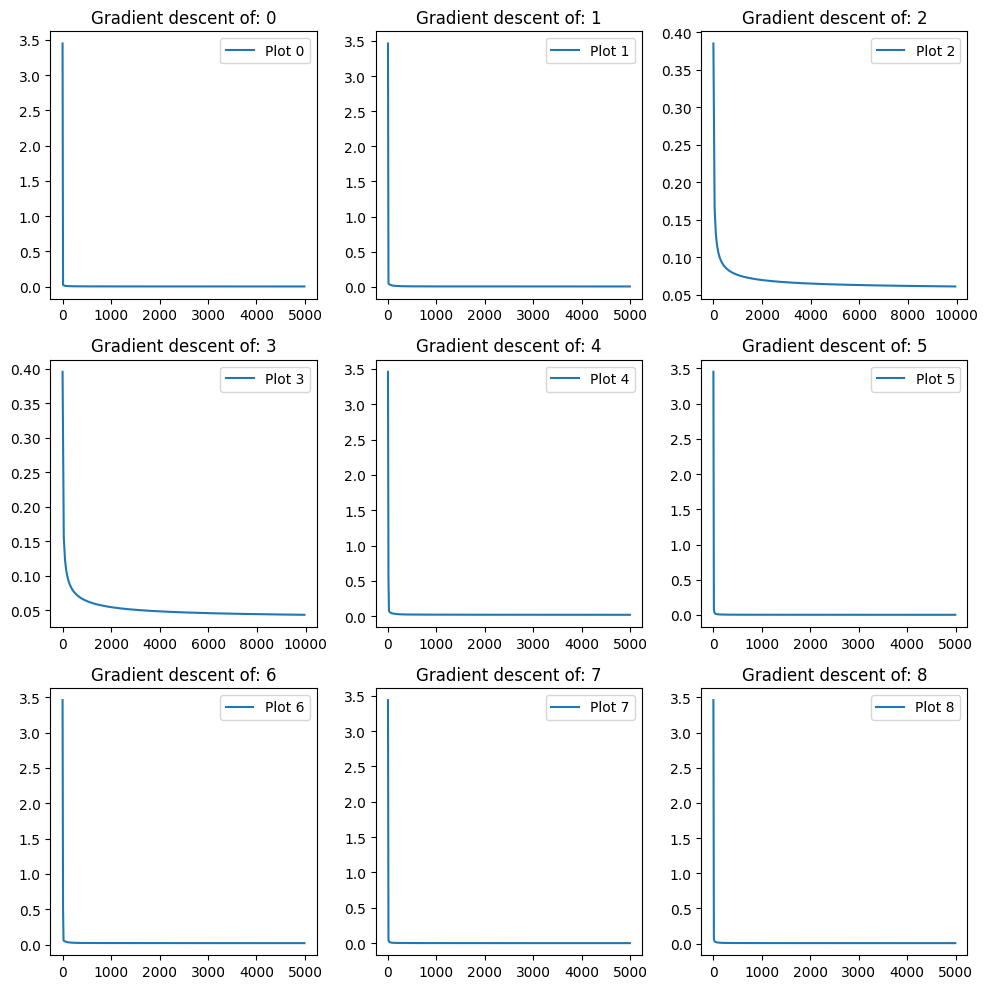

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axes = axes.flatten()

for i in range(9):
    axes[i].plot(history[i][:,0], history[i][:,1], label=f'Plot {i}')
    axes[i].set_title(f'Gradient descent of: {i}')
    axes[i].legend()
    
# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [11]:
predictions = np.array([predict(x, models) for x in X_test])
accurate = np.sum(predictions == y_test)
accuracy = accurate / len(y_test) * 100

print(f'accurate: {accurate}, wrong: {len(y_test) - accurate}')
print(f'accuracy: {accuracy}%')

accurate: 19634, wrong: 366
accuracy: 98.17%


2024-01-30 11:37:51.584804: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 11:37:51.629966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 11:37:51.630002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 11:37:51.631395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 11:37:51.638553: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 11:37:51.639225: I tensorflow/core/platform/cpu_feature_guard.cc:1

Epoch 1/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.9864 - accuracy: 0.9612
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1610 - accuracy: 0.9859
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0961 - accuracy: 0.9895
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0708 - accuracy: 0.9909
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0542 - accuracy: 0.9915
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0509 - accuracy: 0.9920
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0379 - accuracy: 0.9930
Epoch 8/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0375 - accuracy: 0.9933
Epoch 9/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0364 - accuracy: 0.9936
Epoch 10/10
625/625 [==============================] - 1s 942us/step - loss: 0.073

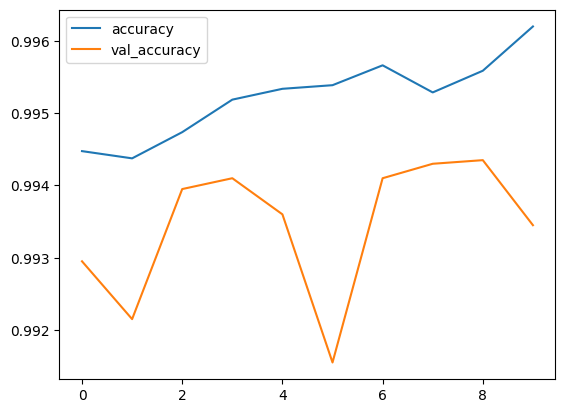

In [12]:
# =================================================================================================================
#                                           NEURAL NETWORK (BONUS)
#=================================================================================================================

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(65,)),  
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Visualize training history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [27]:
#=================================================================================================================
#                                           Test Section
#=================================================================================================================

# Recognize a digit from a custom image using logistic regression
custom_image_path = 'image_10040.jpg'
preprocessed_image_logistic = preprocess_image(custom_image_path)
# preprocessed_image_logistic_scaled = scaler_custom.transform([preprocessed_image_logistic])
predicted_label_logistic_image = predict(preprocessed_image_logistic, models)


# Recognize a digit from a custom image using the neural network
preprocessed_image_nn = preprocess_image(custom_image_path)
preprocessed_image_nn = preprocessed_image_nn.reshape(1, 65)
predicted_label_nn_image = np.argmax(model.predict(preprocessed_image_nn))

print(predicted_label_logistic_image)
print(predicted_label_nn_image)

1/1 [==============================] - 0s 33ms/step
3
2


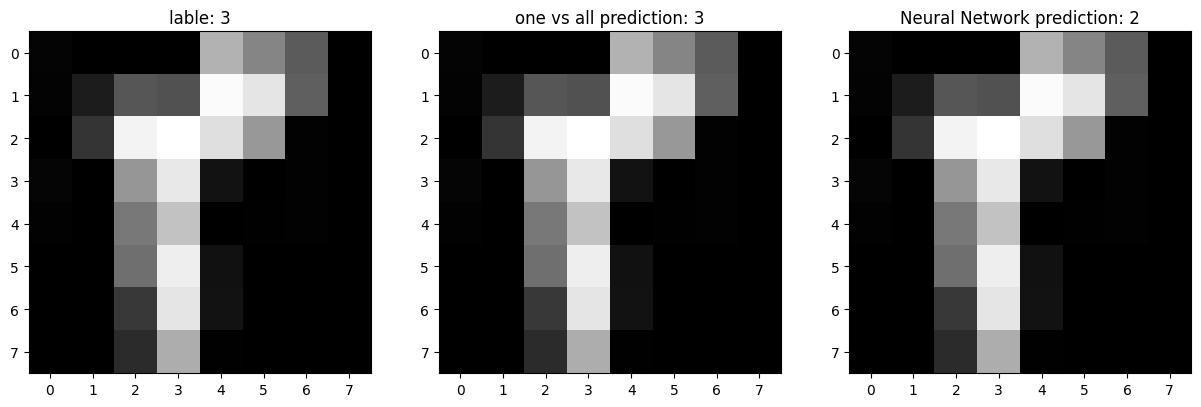

In [30]:
#=================================================================================================================
#                                           Visualization
#=================================================================================================================


def draw_image(img, label, p_logistic, p_NN):
    img_copy = np.copy(img)
    if len(img) > 64:
        img = img[len(img)-64:]
    
    img = img.reshape((8, 8))
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img, cmap='gray', interpolation='nearest')
    axes[0].set_title(f"lable: {label}")
    
    axes[1].imshow(img, cmap='gray', interpolation='nearest')
    axes[1].set_title(f"one vs all prediction: {p_logistic}")
    
    axes[2].imshow(img, cmap='gray', interpolation='nearest')
    axes[2].set_title(f"Neural Network prediction: {p_NN}")
    
    plt.show()

def draw_list_of_images(X, y, indexes):
    for i in indexes:
        img = X[i]
        draw_image(img, y[i], predict(img, models), np.argmax(model.predict(np.expand_dims(img, axis=0)), axis=1)[0])
        
# indexes_to_draw = [i for i in range(10)]
# draw_list_of_images(X_test, y_test, indexes_to_draw)


draw_image(preprocessed_image_logistic, "3", predicted_label_logistic_image, predicted_label_nn_image)